<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/statistics/Markov_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title **Imports** { display-mode: "form" }
import warnings
warnings.filterwarnings("ignore")

import jax
import jax.numpy as jnp
from jax import random, grad, vmap 
import matplotlib.pyplot as plt 
import seaborn as sns
import altair as alt
import pandas as pd
from functools import partial
from math import factorial 

import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

sns.set_style('whitegrid')

In [2]:
def f(transition_probs, state, key):
  new_state = jax.random.choice(key, jnp.array([0,1]), p=transition_probs[state])
  return new_state, ()

In [3]:
tp = jnp.array([[0.5, 0.5],
                [0.2, 0.8]])

In [4]:
def sample_path(n, init_state, init_key_num):
  state, path = jax.lax.scan(partial(f, tp), init_state, jax.random.split(jax.random.PRNGKey(init_key_num), n))
  return state 

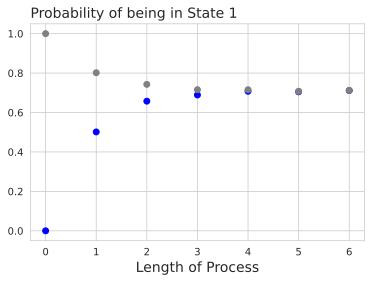

In [10]:
colors = ['blue', 'grey']
for i in jnp.arange(0, 7):
  for j in [0, 1]:
    length_n_path = partial(sample_path, i, j)
    paths = jax.vmap(length_n_path)(jnp.arange(10000))
    plt.scatter(i, jnp.mean(paths), color=colors[j])
plt.title('Probability of being in State 1', loc='left', size=14)
plt.xlabel('Length of Process', size=14)
plt.show()